## Multi-label Classification
* The target field tags is basically a list of labels. Once we extract each of these labels from tags, this is essentially a multi-label text classifictaion problem.

In [1]:
#Import libraries

import pandas as pd
import numpy as np

### Exploratory Data Analysis
* Read the data
* Examine the contents, shape and types
* Analyze the data for missing values
* Identify important features (Image and category can be prefunctionarily ignored as they evidently don't add any value.)

In [2]:
data = pd.read_csv('recipes_82k.csv')

In [3]:
data.sample(10)

,category,cooking_method,cuisine,image,ingredients,prep_time,recipe_name,serves,tags
22069,NaN,['For the chicken: Preheat the oven to 325 deg...,[],https://food.fnr.sndimg.com/content/dam/images...,"['1/4 cup olive oil', '1 tablespoon dark chili...",NaN,Chicken Paella,4 servings,"Mexican Chicken,Chicken,Poultry,Mexican Rice,R..."
21609,NaN,"['Preheat the oven to 350 degrees F.', 'For th...",[],https://food.fnr.sndimg.com/content/dam/images...,"['6 strips thick-cut bacon, diced', '3 cloves ...",NaN,Chicken Alfredo Manicotti,6 servings,"Alfredo,Chicken,Poultry,Main Dish"
34854,NaN,"['To prepare the beans, put the beans in a pot...",[],https://food.fnr.sndimg.com/content/dam/images...,"['1 1/2 pounds dried pinto beans, cleaned, rin...",NaN,Frijoles Borrachos,8 servings,"Easy Main Dish,Easy,Main Dish,Beans and Legume..."
4299,NaN,['Place chicken between 2 sheets of plastic wr...,[],https://food.fnr.sndimg.com/content/dam/images...,"['1 tablespoon vegetable oil', '2 (6 to 8 ounc...",P0Y0M0DT0H5M0.000S,Bacon-Wrapped Chicken Sandwich,2 sandwiches,"Easy Chicken,Chicken,Easy,Poultry,Easy Lunch R..."
22399,NaN,['Place the chicken wings in a large stockpot ...,[],https://food.fnr.sndimg.com/content/dam/images...,"['5 pounds chicken wings, rinsed and patted dr...",P0Y0M0DT0H10M0.000S,Chicken Stock,2 quarts,"American,Celery,Vegetable,Chicken,Poultry,Carr..."
28430,NaN,['Preheat the oven to 350 degrees F. Line a ba...,[],https://food.fnr.sndimg.com/content/dam/images...,"['6 large skin-on chicken breasts', '1 teaspoo...",NaN,Crispy Chicken Skins,18 pieces,"Chicken,Poultry,Appetizer,Snack,Gluten Free,Lo..."
51076,NaN,['For the Pho Stock: Add the beef base and 1 q...,[],https://food.fnr.sndimg.com/content/dam/images...,"['2 tablespoons (30 g) beef bouillon or base',...",NaN,Quick Beef Pho,Makes 2 large or 4 small bowls,"Noodles,Beef,Meat,Main Dish"
75797,[],['For the tea and fish: Soak the dried tea in ...,[],https://food.fnr.sndimg.com/content/dam/images...,"['1/3 cup Lapsang Souchong tea', '1/3 cup bals...",P0Y0M0DT2H0M0.000S,Tea Salmon in the Garden with Lemon,4 servings,"Easy Grilling Recipes,Easy,Grilling,Wok Recipe..."
67108,[],"['Whisk together shallot, mayonnaise, vinegar,...",[],https://food.fnr.sndimg.com/content/dam/images...,"['1/2 large shallot, minced', '1/2 cup mayonna...",P0Y0M0DT0H8M0.000S,Shredded Red Leaf Salad with Creamy Red Wine V...,about 4 servings,"American,Salad Recipes,Salad Dressing Recipes,..."
44646,NaN,"['Place the rosemary, thyme, bay leaf and clov...",[],https://food.fnr.sndimg.com/content/dam/images...,"['1 sprig fresh rosemary', '1 sprig fresh thym...",P0Y0M0DT0H15M0.000S,Osso Buco,6 servings,"Easy Main Dish,Easy,Main Dish,Dutch Oven,Itali..."


In [4]:
data.shape

(82245, 9)

In [5]:
data.dtypes

category          object
cooking_method    object
cuisine           object
image             object
ingredients       object
prep_time         object
recipe_name       object
serves            object
tags              object
dtype: object

In [6]:
columns = ['category','cuisine', 'prep_time', 'recipe_name', 'serves']

for column in columns:
    print(data[column].unique(),data[column].nunique())

[nan '[]'] 1
["['American']" nan "['Italian']" "['Mexican']" "['Chinese', 'Japanese']"
 "['Indian']" "['American', 'Mexican']" "['American', 'Italian']"
 "['Asian', 'Hawaiian']" "['Mediterranean']" "['American', 'Latin']"
 "['American', 'Czech', 'Hungarian']" "['American', 'Cuban', 'Latin']"
 "['Latin']" "['Latin', 'Mexican']" "['Asian']"
 "['American', 'Argentinian']" "['American', 'Greek']"
 "['American', 'Tex Mex']" "['Tex Mex']" "['Cuban', 'Latin']"
 "['Asian', 'Chinese']" "['Brazilian']" '[]'] 23
['20 minutes' '15 minutes' '5 minutes' '10 minutes' '0 minutes'
 '2 minutes' '30 minutes' '35 minutes' '25 minutes' nan '45 minutes'
 '85 minutes' '240 minutes' '60 minutes' '150 minutes' '300 minutes'
 '80 minutes' '40 minutes' '360 minutes' '50 minutes' '12 minutes'
 '8 minutes' '55 minutes' '90 minutes' '3 minutes' '75 minutes'
 '65 minutes' '105 minutes' '70 minutes' '14 minutes' '28 minutes'
 '1 minutes' '100 minutes' '840 minutes' '7 minutes' '480 minutes'
 '600 minutes' '130 minute

In [7]:
#We can see the values in a lot of fields are the strings nan or [], so we replace it with np.nan for ease

data.replace(["nan","[]"], np.nan, inplace = True)

#### Examine the proportion of missing values

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82245 entries, 0 to 82244
Data columns (total 9 columns):
category          0 non-null float64
cooking_method    82188 non-null object
cuisine           1383 non-null object
image             82245 non-null object
ingredients       80992 non-null object
prep_time         58630 non-null object
recipe_name       82245 non-null object
serves            82244 non-null object
tags              82011 non-null object
dtypes: float64(1), object(8)
memory usage: 5.6+ MB


In [97]:
data.isnull().sum() 

category          82245
cooking_method       57
cuisine           80862
image                 0
ingredients        1253
prep_time         23615
recipe_name           0
serves                1
tags                234
dtype: int64

In [9]:
#From the unique values and counts above, we can see the field prep_time has a lot of fields with values starting with P0Y0M0DT. It's not any time format I'm familiar with and I couldn't make any sense out of it, so I'm considering it the same as nan

data.prep_time.str.count("P0Y0M0DT").sum()

51378.0

,Total,Percent
category,82245,1.000000
cuisine,80862,0.983184
prep_time,23615,0.287130
ingredients,1253,0.015235
tags,234,0.002845


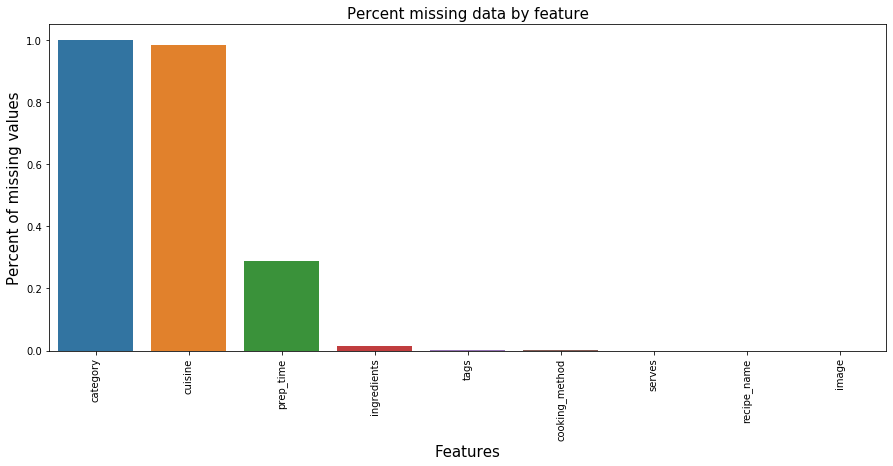

In [11]:
#Visualize the proportion of missing values

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')

sns.barplot(x=missing_data.index, y=missing_data['Percent'])

plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

missing_data.head()

In [12]:
#Examine the rows where the target variable is missing to check if the corresponding features are missing or corrupt

data[data['tags'].isna()]

,category,cooking_method,cuisine,image,ingredients,prep_time,recipe_name,serves,tags
64602,NaN,"[""Cook sausage in a cast iron skillet. When do...",NaN,https://food.fnr.sndimg.com/content/dam/images...,"['1 pound bulk breakfast sausage', '1/4 cup fl...",P0Y0M0DT0H5M0.000S,Sawmill Gravy,2 1/2 cups gravy,NaN
64666,NaN,"['Eat Your Veggies', 'By: Serena Ball, M.S., R...",NaN,https://food.fnr.sndimg.com/content/dam/images...,NaN,0 minutes,"Healthy Recipes, Tips and Meal Ideas",0,NaN
64688,NaN,"['Directions', 'Cook a pinch each of saffron a...",NaN,https://food.fnr.sndimg.com/content/dam/images...,NaN,10.0 minutes,Saffron,0,NaN
64714,NaN,"['Directions', 'Preheat oven to 425 degrees. I...",NaN,https://food.fnr.sndimg.com/content/dam/images...,"['2 cups sifted all-purpose flour', '1 tablesp...",55.0 minutes,"Sage, Bacon, and Cheddar Cream Biscuits Recipe",0,NaN
64735,NaN,"['Add vodka and saki to a cocktail shaker, sti...",NaN,https://food.fnr.sndimg.com/content/dam/images...,"['3 ounces vodka', '1/4-ounce saki', 'Cucumber...",NaN,Sakitini,1 martini,NaN
...,...,...,...,...,...,...,...,...,...
81842,NaN,"['Directions', 'Heat oil over medium high heat...",NaN,https://food.fnr.sndimg.com/content/dam/images...,['3 1/2 pounds of lamb (deboned and cut in 1-i...,61.0 minutes,Yogurt Braised Leg of Lamb Recipe,0,NaN
82106,NaN,"['Directions', 'Grill or broil the sausage in ...",NaN,https://food.fnr.sndimg.com/content/dam/images...,"['1/2 pound sweet Italian sausage', '2 pounds ...",0 minutes,Ziti con Broccoli di Rape e Salsicce (Ziti wit...,0,NaN
82108,NaN,['For the caviar spherification: In a medium b...,NaN,https://food.fnr.sndimg.com/content/dam/images...,"[""Caviar spherification tool kit (see Cook's N...",NaN,Zombie Drink in Edible Glassware,2 to 4 servings,NaN
82172,NaN,['Make bechamel: Heat milk just until small bu...,NaN,https://food.fnr.sndimg.com/content/dam/images...,"['4 tablespoons unsalted butter', '4 tablespoo...",P0Y0M0DT1H0M0.000S,Zucchini Lasagna,6 to 8 servings,NaN


In [13]:
#Recipes with no target tags can be used to test the final model, so we extract and store them in a list for later use

test_sample = data[data['tags'].isna()].cooking_method
test_sample = test_sample.tolist()

### Data Pre-processing
* Rows without any null values are only around 1400. 
* We would have to either drop the fields prep_time and serves or impute the missing values by building a sub-model to predict the missing values.
* Dropping that many data items would adversely affect our model as both prep_time and serves are fields that matter when creating tags whereas building a submodel would be a computational overhead.
* A neural net could infer details like the prep_time and serving amount from the recipe alone. Given all the missing values, I think a neural net trained on cooking_method alone is the best approach here

In [14]:
data.dropna(subset=['tags','cooking_method'], how='any', inplace=True)

data = data.reset_index(drop=True)

In [15]:
data.isnull().sum() 

category          81957
cooking_method        0
cuisine           80577
image                 0
ingredients        1231
prep_time         23547
recipe_name           0
serves                1
tags                  0
dtype: int64

In [16]:
data.shape

(81957, 9)

###### Extracting target tags and splitting them into labels

In [17]:
target = data.tags

In [18]:
labels = list()

In [19]:
for item in target:
    temp = item.split(',')
    for x in temp:
        x_ = x.strip()
        if x_ not in labels:
            labels.append(x_) 
    else:
            continue

In [20]:
num_labels = len(labels)
print(num_labels)

765


In [21]:
 print(labels)

['Dairy Free', 'Gluten Free', 'Keto Recipes', 'Kid Friendly', 'Low Carb', 'Under 30 Minutes', 'Air Fryer Recipes', 'Paleo', 'Vegetarian Meals', 'Whole 30 Recipes', 'Meal Prep Recipes', 'Freezer Meals', 'Slow Cooker Recipes', 'Pressure Cooker Recipes', 'Healthy', 'Indian Recipes', 'Smoothie Recipes', 'Dairy Recipes', 'Fruit', 'Mango', 'Pureeing Recipes', 'Low-Fat', 'Low Sodium', 'Easy Snack Recipes', 'Easy', 'Snack', 'Banana', 'Cucumber', 'Vegetable', 'Watermelon Recipes', 'Heart-Healthy', 'Low Calorie', 'Low-Cholesterol', 'Strawberry', 'Peach Recipes', 'Brunch', 'Breakfast', 'Peanut Butter', 'Tea Recipes', 'Grain Recipes', 'Oats', 'Pineapples', 'High Fiber', 'Vegan', 'Coffee Recipes', 'Frozen Drink Recipes', 'Papaya Recipes', 'Summer', 'Chocolate', 'Almond Recipes', 'Nut Recipes', 'Easy Breakfast Recipes', 'Healthy Breakfast', 'Avocado', 'Blueberry', 'Buttermilk', 'Orange Recipes', 'Coconut Recipes', 'Main Dish', 'Vegetarian', 'Raspberry Recipes', 'Recipes for Two', 'Ice Cream', 'Desse

#### Label Encoding
* A column corresponding to each tag is added to the dataframe and marked with 1 if the tag corresponds to a given recipe

In [23]:
for label in labels:
    data[label]=0

In [24]:
data.head()

,category,cooking_method,cuisine,image,ingredients,prep_time,recipe_name,serves,tags,Dairy Free,...,Long Island Iced Tea,Sponge Cake,Teriyaki Chicken,Lebanese Recipes,Salisbury Steak,Sweet Potato Casserole,Lemon Meringue Pie,Pumpkin Cake,Rhubarb Crisp,Sweet and Sour Pork
0,NaN,['Set the racks in the middle and upper thirds...,['American'],https://www.skinnytaste.com/wp-content/uploads...,"['1 tablespoons extra virgin olive oil', '1 cu...",20 minutes,Mediterranean Sea Bass,4 servings,"Dairy Free, Gluten Free, Keto Recipes, Kid Fri...",0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,['Place the eggs in the air fryer basket and c...,['American'],https://www.skinnytaste.com/wp-content/uploads...,"['4 large eggs', 'Salt (black pepper, everythi...",15 minutes,Air Fryer Hard Boiled Eggs,4 eggs,"Air Fryer Recipes, Dairy Free, Gluten Free, Ke...",0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,"['Air Fryer directions:', 'Preheat air fryer t...",['American'],https://www.skinnytaste.com/wp-content/uploads...,"['olive oil spray', '4 about 5 ounce each salm...",5 minutes,Air Fryer Basil-Parmesan Salmon,4 servings,"Air Fryer Recipes, Gluten Free, Keto Recipes, ...",0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,"['Preheat the oven to 400F.', 'Pour 2 tablespo...",['American'],https://www.skinnytaste.com/wp-content/uploads...,['1/2 cup freshly grated Parmesan (not pre-gra...,15 minutes,Everything Parmesan Crisps,4 servings,"Gluten Free, Keto Recipes, Kid Friendly, Low C...",0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,['Cook potatoes in a large pot of salted water...,['American'],https://www.skinnytaste.com/wp-content/uploads...,['3 1/2 pounds new potatoes (about 10 peeled a...,10 minutes,Potato and Green Bean Salad,12 servings,"Dairy Free, Gluten Free, Kid Friendly, Vegetar...",0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data.shape

(81957, 774)

In [26]:
for index, row in data.iterrows():
    for label in labels:
        if label in row['tags']:
            data.at[index, label] = 1


In [27]:
data.head()

,category,cooking_method,cuisine,image,ingredients,prep_time,recipe_name,serves,tags,Dairy Free,...,Long Island Iced Tea,Sponge Cake,Teriyaki Chicken,Lebanese Recipes,Salisbury Steak,Sweet Potato Casserole,Lemon Meringue Pie,Pumpkin Cake,Rhubarb Crisp,Sweet and Sour Pork
0,NaN,['Set the racks in the middle and upper thirds...,['American'],https://www.skinnytaste.com/wp-content/uploads...,"['1 tablespoons extra virgin olive oil', '1 cu...",20 minutes,Mediterranean Sea Bass,4 servings,"Dairy Free, Gluten Free, Keto Recipes, Kid Fri...",1,...,0,0,0,0,0,0,0,0,0,0
1,NaN,['Place the eggs in the air fryer basket and c...,['American'],https://www.skinnytaste.com/wp-content/uploads...,"['4 large eggs', 'Salt (black pepper, everythi...",15 minutes,Air Fryer Hard Boiled Eggs,4 eggs,"Air Fryer Recipes, Dairy Free, Gluten Free, Ke...",1,...,0,0,0,0,0,0,0,0,0,0
2,NaN,"['Air Fryer directions:', 'Preheat air fryer t...",['American'],https://www.skinnytaste.com/wp-content/uploads...,"['olive oil spray', '4 about 5 ounce each salm...",5 minutes,Air Fryer Basil-Parmesan Salmon,4 servings,"Air Fryer Recipes, Gluten Free, Keto Recipes, ...",0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,"['Preheat the oven to 400F.', 'Pour 2 tablespo...",['American'],https://www.skinnytaste.com/wp-content/uploads...,['1/2 cup freshly grated Parmesan (not pre-gra...,15 minutes,Everything Parmesan Crisps,4 servings,"Gluten Free, Keto Recipes, Kid Friendly, Low C...",0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,['Cook potatoes in a large pot of salted water...,['American'],https://www.skinnytaste.com/wp-content/uploads...,['3 1/2 pounds new potatoes (about 10 peeled a...,10 minutes,Potato and Green Bean Salad,12 servings,"Dairy Free, Gluten Free, Kid Friendly, Vegetar...",1,...,0,0,0,0,0,0,0,0,0,0


### Building the Neural Net
* I'm using the pretrained text classifier BERT as it can give fantastic results with minimal finetuning.
* The learning rate and max seq lenght has be initialised according to thr original paper - https://arxiv.org/abs/1810.04805

In [45]:
#Install bert and fastai

!pip install pytorch_pretrained_bert
!pip install fastai

In [29]:
#Import libraries

from pathlib import Path
from typing import *

import torch
import torch.optim as optim

from fastai import *
from fastai.vision import *
from fastai.text import *
from fastai.callbacks import *

In [30]:
#Define constants

max_lr = 3e-5
epochs = 2
batch_size = 4
max_seq_len = 512
target_col = "cooking_method"
bert_model_name = "bert-base-uncased"
bert_model_path = "https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt"

In [31]:
#Download the pre-trained model

from pytorch_pretrained_bert import BertTokenizer

bert_tok = BertTokenizer.from_pretrained(bert_model_path)

#### Define a wrapper for the tokenizer as per fastai conventions


In [32]:
class FastAiBertTokenizer(BaseTokenizer):
    def __init__(self, tokenizer: BertTokenizer, max_seq_len, **kwargs):
        self._pretrained_tokenizer = tokenizer
        self.max_seq_len = max_seq_len

    def __call__(self, *args, **kwargs):
        return self

    def tokenizer(self, t:str) -> List[str]:
        
        # We need to add special tokens at the beginning and end of each sentence for BERT to work properly
        return ["[CLS]"] + self._pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2] + ["[SEP]"]

In [33]:
fastai_tokenizer = Tokenizer(tok_func=FastAiBertTokenizer(bert_tok, 
                                                          max_seq_len=max_seq_len), 
                                                          pre_rules=[], 
                                                          post_rules=[])


In [34]:
#Construct a fastai Vocab object to use for preprocessing

fastai_bert_vocab = Vocab(list(bert_tok.vocab.keys()))

In [35]:
#Split the data into train and val

from sklearn.model_selection import train_test_split

train, val = train_test_split(data)

#### Build Databunch 
* Build the databunch using the tokenizer and vocabulary we build above
* passing the include_bos=False and include_eos=False options to prevent fastai from adding its own SOS/EOS tokens that will interfere with BERT's SOS/EOS tokens.

In [36]:
databunch = TextDataBunch.from_df(".", train, val,
                  tokenizer=fastai_tokenizer,
                  vocab=fastai_bert_vocab,
                  include_bos=False,
                  include_eos=False,
                  text_cols=target_col,
                  label_cols=labels,
                  bs=batch_size,
                  collate_fn=partial(pad_collate, pad_first=False, pad_idx=0),
             )

#### Training the model
* Load the model
* Define the loss function. Since this is a multilabel classification problem, I'm using BCEWithLogitsLoss
* Define the evaluation metric
* Build the Learner
* Finetune the model to fit the new data



In [37]:
from pytorch_pretrained_bert.modeling import BertConfig, BertForSequenceClassification

bert_model = BertForSequenceClassification.from_pretrained(bert_model_name, num_labels = num_labels)

In [38]:
print(bert_model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
   

In [0]:
loss_func = nn.BCEWithLogitsLoss()

In [0]:
acc_ = partial(accuracy_thresh, thresh=0.25)

In [0]:
learner = Learner(
    databunch, 
    bert_model,
    loss_func=loss_func,
    model_dir='.', 
    metrics=acc_, 
  )

#### Training the model

* The model was trained on a colab instance gpu for two epochs and each epoch took around 2 and a half hours. 
* Buffered data was truncated after reaching the output size limit: There is a limited memory for displaying output of a cell on colab. The output is truncated because there is no more memory left free to display the buffered epochs. However, the machine keeps running in the background and the output is processed but it is not displayed because of the buffered limit. 
* Our model still works as desired.
* I trained the model only for two epochs due to time and computational constraints. Even in just two epochs, the model gives an accuracy of 98% and good predictions. Given enough training time, the model could give stellar results.
* I understand the problem statement asked for RMSLE as the evaluation metric but considering this a multilabel classification, I saw no reason to use RMSLE.

In [58]:
learner.fit_one_cycle(epochs, max_lr=max_lr)

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.035607,0.034228,0.988738,2:08:39


Buffered data was truncated after reaching the output size limit.

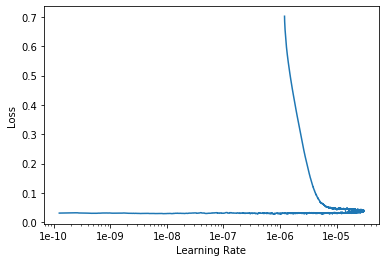

In [112]:
learner.recorder.plot()

### Generating Predictions
* Invoke the predict_tags method to generate tags

In [0]:
def predict_tags(inp_txt):
    print(inp_txt,"\nTags:",learner.predict(inp_txt)[0],"\n")

In [114]:
for item in test_sample[10:30]:
    predict_tags(item)

['Preheat the oven to 300 degrees.', 'Soak the dried cepes in hot water with 1/2 teaspoon salt for 30 minutes. Drain, reserving soaking liquid. Rinse cepes under cool running water to eliminate any grit or sand. Strain soaking liquid through coffee filter paper or several layers of damp cheesecloth and set aside.', 'Wipe caps of fresh mushrooms with damp cloth and a little coarse salt. Set aside.', 'In a large skillet, heat the fat or oil over medium heat. Add the dried cepes and their soaking liquid and cook until all the liquid in the pan has evaporated. Add the ham, shallots, and garlic and cook, stirring, 1 minute. Add the fresh cepes and cook, stirring, over high heat until all the moisture has evaporated. Pour the wine over the mixture and boil down to a glaze.', 'Add 1/2 cup hot water and the tomato. Cook, stirrinmg, over gentle heat for an instant, then add 1/2 teaspoon salt, 1/4 teaspoon pepper, and the parsley.', 'Scrape into an earthenware or enameled cast-iron casserole wit